In [60]:
import time
from src.method_selector import MlMethodSelector, ClassicMethodSelector
from src.measurement_provider import MeasurementProvider
from src.serializer import SenMLCBORSerializer, SenMLJSONSerializer
from src.signal_generator import SignalGenerator
from sys import getsizeof
from src.metric import FeatureMetricEnum, SimilarityMetricEnum
from src.data_type import Measurement
import pandas as pd
import matplotlib as plt
from src.metric import SimilarityMetricEnum
import json
plt.rcParams["figure.dpi"] = 150

In [61]:
def json_serialize(measurements, n1, n2, metrics):
  output = []
  values = [m.value for m in measurements]
  timestamps = [m.timestamp for m in measurements]
  for index, m in enumerate(measurements):
    output.append({
      'n': f'{n1}{n2}',
      'v': values[index],
      't': timestamps[index],
    })
  output.append({
    'n': f'{n1}{n2}',
    'v': metrics,
  })
  return json.dumps(output)

In [62]:
result = {
  "measurements_count": [],
  "Plain_JSON": [],
  "SenML_CBOR": [],
  "SenML_JSON": [],
}
metrics = [1.23 for _ in range(13)]
for datasize in [i * 100 for i in range(1, 11)]:
  if datasize == 0:
    datasize = 1
  dataset = [Measurement(100.123, 100 * i) for i in range(datasize)]
  result["Plain_JSON"].append(getsizeof(json_serialize(dataset, '/72/', '1/2', metrics)))
  result["SenML_CBOR"].append(getsizeof(SenMLCBORSerializer.serialize(dataset, '/72/', '1/2', metrics)))
  result["SenML_JSON"].append(getsizeof(SenMLJSONSerializer.serialize(dataset, '/72/', '1/2', metrics)))
  result["measurements_count"].append(datasize)

In [63]:
df = pd.DataFrame.from_dict(result)

0.49023427986946566
0.5247048138056313


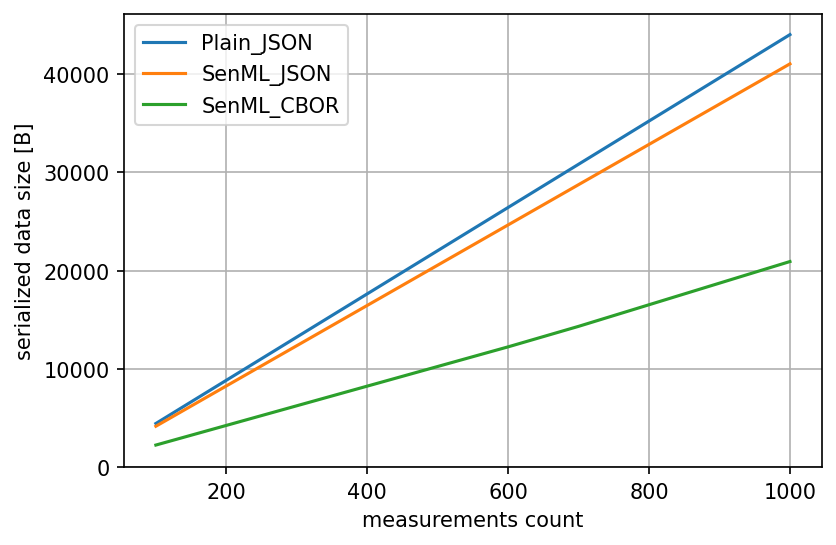

In [67]:
ax = df.plot(x='measurements_count', y=['Plain_JSON', 'SenML_JSON', 'SenML_CBOR'], grid=True, ylim=0)
ax.set_xlabel("measurements count")
ax.set_ylabel("serialized data size [B]")
result
print((result['SenML_JSON'][9] - result['SenML_CBOR'][9]) / result['SenML_JSON'][9])
print((result['Plain_JSON'][9] - result['SenML_CBOR'][9]) / result['Plain_JSON'][9])

0.49023427986946566


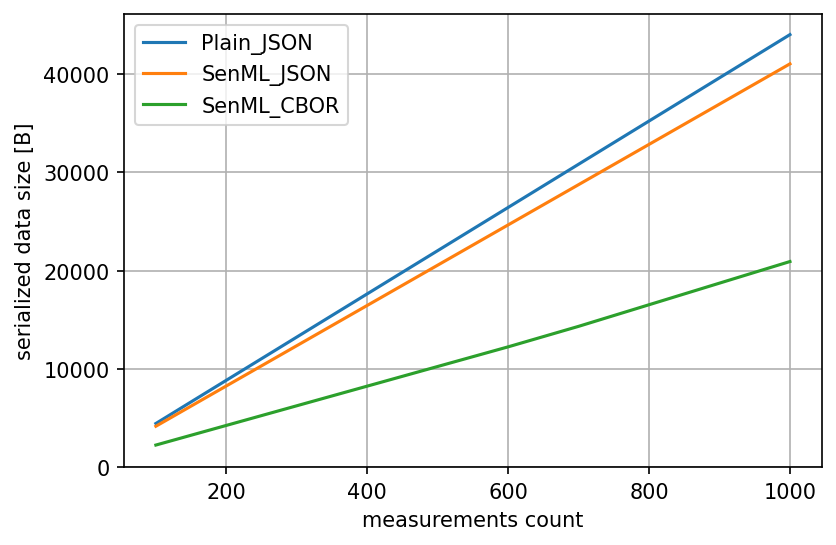

In [ ]:
ax = df.plot(x='measurements_count', y=['Plain_JSON', 'SenML_JSON', 'SenML_CBOR'], grid=True, ylim=0)
ax.set_xlabel("measurements count")
ax.set_ylabel("serialized data size [B]")
result
print((result['SenML_JSON'][9] - result['SenML_CBOR'][9]) / result['SenML_JSON'][9])

In [65]:
for index, row in df[[
  'measurements_count',
  'SenML_CBOR',
  'SenML_JSON',
  'Plain_JSON',
]].iterrows():
  measurements_count = int(row[0])
  SenML_CBOR = int(row[1])
  SenML_JSON = int(row[2])
  Plain_JSON = int(row[3])
  diff1 = Plain_JSON - SenML_CBOR
  diff2 = Plain_JSON - SenML_JSON

  print(f'{measurements_count} & {SenML_CBOR} & {SenML_JSON} & {Plain_JSON} \\\\')
  print('\hline')

100 & 2243 & 4161 & 4440 \\
\hline
200 & 4243 & 8262 & 8840 \\
\hline
300 & 6244 & 12362 & 13240 \\
\hline
400 & 8244 & 16462 & 17640 \\
\hline
500 & 10244 & 20562 & 22040 \\
\hline
600 & 12244 & 24662 & 26440 \\
\hline
700 & 14332 & 28762 & 30840 \\
\hline
800 & 16532 & 32862 & 35240 \\
\hline
900 & 18732 & 36962 & 39640 \\
\hline
1000 & 20932 & 41062 & 44040 \\
\hline
